In [42]:
# Dependencies
import pandas as pd                     # for handling and structuring data
import matplotlib.pyplot as plt         # for creating plots
import scipy.stats as st                # for statistical functions
import numpy as np                      # for generating random numbers and handling numerical operations
from scipy.stats import linregress      # for calculating linear regression
import matplotlib.ticker as ticker      # for formatting axis ticks (e.g., adding commas to large numbers)

In [43]:
## this was originally part of the first cell ##

# Load the Excel file
file_path = 'Most Streamed Spotify Songs 2024 - Research.xlsx'
xls = pd.ExcelFile(file_path)

# Display sheet names to identify relevant data
print(xls.sheet_names)

['Views', 'Likes', 'Most Streamed Spotify Songs 202']


In [44]:
# Load the 'Likes' sheet
likes_df = pd.read_excel(xls, sheet_name='Likes', skiprows=2)

# Rename 'Row Labels' column
likes_df.rename(columns={'Row Labels': 'Song Title'}, inplace=True)

# Load the 'Views' sheet
views_df = pd.read_excel(xls, sheet_name='Views', skiprows=2)
views_df.rename(columns={'Row Labels': 'Song Title'}, inplace=True)

most_streamed_df = pd.read_excel(xls, sheet_name='Most Streamed Spotify Songs 202')

views_df.head()

,Song Title,Max of Spotify Popularity,Min of All Time Rank,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,36.0,1018,11477477.0,11457166.0,2.332323e+11
1,Love You So,44.0,1918,16326628.0,7603329.0,2.148440e+11
2,Oh No,41.0,473,40284121.0,17978707.0,6.108856e+10
3,Funny Song,39.0,1539,5866282.0,11793478.0,3.994631e+10
4,Aesthetic,44.0,114,33025746.0,6658234.0,3.985063e+10


In [45]:
# Ensure that the key columns have consistent names across DataFrames to facilitate merging
likes_df.rename(columns={'Song Title': 'Song'}, inplace=True)
views_df.rename(columns={'Song Title': 'Song'}, inplace=True)

# Select relevant columns
likes_df = likes_df[['Song', 'Sum of TikTok Likes', 'Sum of YouTube Likes']]
views_df = views_df[['Song', 'Max of Spotify Popularity', 'Sum of Spotify Streams', 'Sum of YouTube Views', 'Sum of TikTok Views']]

views_df.head()

,Song,Max of Spotify Popularity,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,36.0,11477477.0,11457166.0,2.332323e+11
1,Love You So,44.0,16326628.0,7603329.0,2.148440e+11
2,Oh No,41.0,40284121.0,17978707.0,6.108856e+10
3,Funny Song,39.0,5866282.0,11793478.0,3.994631e+10
4,Aesthetic,44.0,33025746.0,6658234.0,3.985063e+10


In [46]:
likes_df

,Song,Sum of TikTok Likes,Sum of YouTube Likes
0,Without Me,2.354115e+08,3.804333e+07
1,Blinding Lights,3.373226e+08,1.009321e+07
2,goosebumps,2.049043e+08,1.355672e+07
3,Heat Waves,5.133344e+08,1.494752e+07
4,STAY (with Justin Bieber),2.246991e+09,1.466142e+07
...,...,...,...
4315,Chegou a Hora de Ir para Cama (Playback),NaN,4.422300e+04
4316,Die For You (Remix Acapella),NaN,NaN
4317,Chunni Me Perfume Lagawe,NaN,2.581637e+06
4318,Andas En Mi Cabeza,NaN,4.950177e+06


In [47]:
# Combine the two DataFrames based on the 'Song' column
merged_df = pd.merge(likes_df, views_df, on='Song', how='inner')

merged_df.head()

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Without Me,2.354115e+08,38043329.0,83.0,6.336157e+09,4.304317e+09,2.394606e+09
1,Blinding Lights,3.373226e+08,10093211.0,83.0,8.542797e+09,8.338071e+08,3.501177e+09
2,goosebumps,2.049043e+08,13556723.0,82.0,2.892012e+09,1.413468e+09,1.899768e+09
3,Heat Waves,5.133344e+08,14947520.0,82.0,2.996181e+09,1.272898e+09,5.518430e+09
4,STAY (with Justin Bieber),2.246991e+09,14661425.0,78.0,6.214201e+09,1.256974e+09,2.371238e+10


In [48]:
# Remove rows with missing values
merged_df.dropna(inplace=True)

formatted_df = merged_df.style.format({
    'Sum of TikTok Likes': '{:,.2f}',
    'Sum of YouTube Likes': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',
    'Sum of YouTube Views': '{:,.2f}',
    'Sum of TikTok Views': '{:,.2f}',
    'Max of Spotify Popularity': '{:,}'  # No decimals
})

formatted_df

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Without Me,"235,411,451.00","38,043,329.00",83.0,"6,336,157,140.00","4,304,317,053.00","2,394,605,888.00"
1,Blinding Lights,"337,322,563.00","10,093,211.00",83.0,"8,542,796,910.00","833,807,130.00","3,501,177,394.00"
2,goosebumps,"204,904,313.00","13,556,723.00",82.0,"2,892,012,190.00","1,413,467,945.00","1,899,767,927.00"
3,Heat Waves,"513,334,446.00","14,947,520.00",82.0,"2,996,181,078.00","1,272,898,075.00","5,518,429,969.00"
4,STAY (with Justin Bieber),"2,246,991,336.00","14,661,425.00",78.0,"6,214,200,698.00","1,256,973,582.00","23,712,377,029.00"
5,Happier,"604,805,585.00","27,265,636.00",79.0,"4,599,741,996.00","2,562,036,370.00","4,299,377,895.00"
6,Numb,"56,996,667.00","18,713,763.00",80.0,"2,632,033,704.00","2,707,030,315.00","692,985,815.00"
7,Sweater Weather,"324,536,571.00","18,338,729.00",85.0,"2,916,412,507.00","1,648,485,745.00","2,911,383,718.00"
8,Smells Like Teen Spirit,"95,247,745.00","18,999,419.00",77.0,"2,021,997,793.00","2,280,324,762.00","720,283,921.00"
9,As It Was,"1,633,970,617.00","11,250,630.00",87.0,"6,601,375,963.00","1,036,927,254.00","15,405,881,843.00"


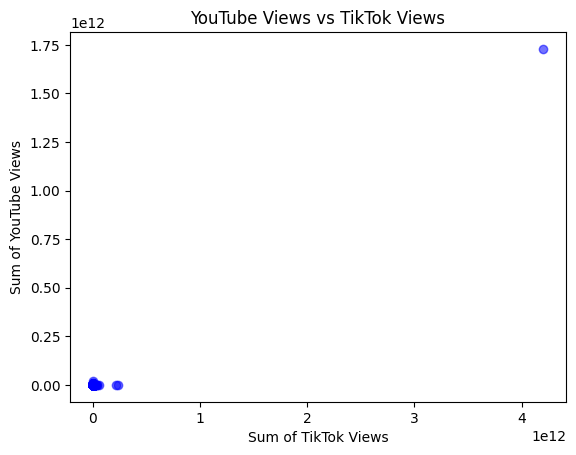

In [49]:
# YouTube vs TikTok Views
# Does high TikTok views correlate to high YouTube streams?

# Create a scatterplot
plt.scatter(merged_df['Sum of TikTok Views'], merged_df['Sum of YouTube Views'], marker='o', facecolors='b', alpha=0.55)
plt.xlabel('Sum of TikTok Views')
plt.ylabel('Sum of YouTube Views')
#plt.xticks(rotation=90)
plt.title('YouTube Views vs TikTok Views')
#plt.tight_layout()
plt.show()

# this ended up not looking great - going to reduce down to the top 25 instead

##what is going on here?? 4000 points?

In [50]:
# Does the top 500 most viewed TikTok songs have high YouTube Views?

# Create a bar chat

# Sort DataFrame by TikTok Views in descending order
top_500_tiktok_df = merged_df.sort_values(by='Sum of TikTok Views', ascending=False).head(501)

# Remove the 'Grand Total' row
top_500_tiktok_df = top_500_tiktok_df[top_500_tiktok_df['Song'] != 'Grand Total']

# Display top 25 TikTok-viewed songs with their YouTube Views
top_500_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of YouTube Views']]


,Song,Sum of TikTok Views,Sum of YouTube Views
3201,Monkeys Spinning Monkeys,2.332323e+11,1.145717e+07
2962,Love You So,2.148440e+11,7.603329e+06
2863,Oh No,6.108856e+10,1.797871e+07
3500,Funny Song,3.994631e+10,1.179348e+07
3011,Aesthetic,3.985063e+10,6.658234e+06
...,...,...,...
83,Sugar,1.756611e+09,4.227839e+09
155,I WANNA BE YOUR SLAVE,1.755214e+09,2.862431e+08
197,Attention,1.748734e+09,2.088520e+09
786,Quï¿½ï¿½ Mï¿½ï¿,1.748578e+09,8.741080e+08


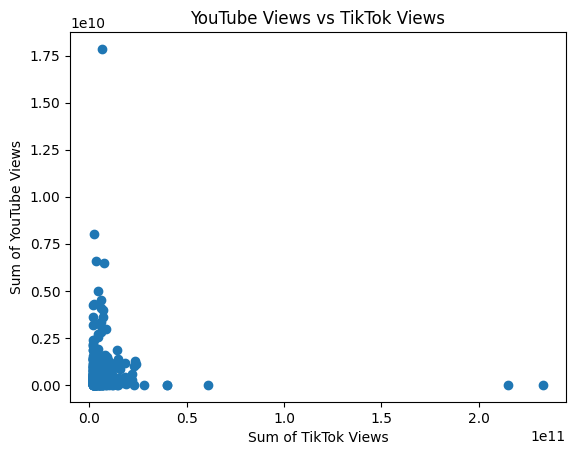

In [51]:
# Spotify vs TikTok Views
# Does high TikTok views correlate to high YouTube Views?

# Create a scatterplot

plt.scatter(top_500_tiktok_df['Sum of TikTok Views'], top_500_tiktok_df['Sum of YouTube Views'])
plt.xlabel('Sum of TikTok Views')
plt.ylabel('Sum of YouTube Views')
plt.title('YouTube Views vs TikTok Views')
plt.show()

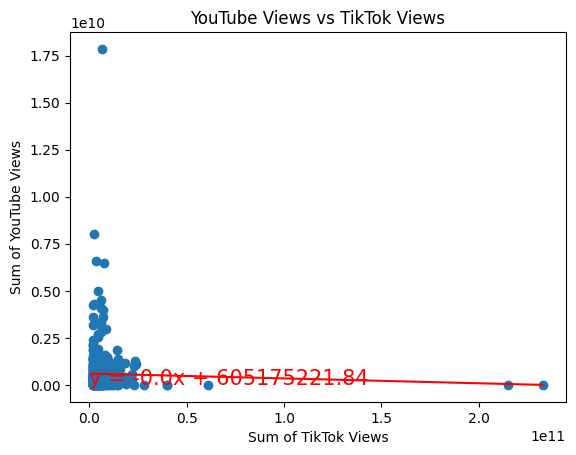

The r^2-value is: 0.0010704166800836227


In [52]:
# Add the linear regression equation and line to plot
x_values = top_500_tiktok_df["Sum of TikTok Views"]
y_values = top_500_tiktok_df["Sum of YouTube Views"]

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

#the scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel("Sum of TikTok Views")
plt.ylabel("Sum of YouTube Views")
plt.title("YouTube Views vs TikTok Views")

plt.show()

print(f"The r^2-value is: {rvalue**2}")

In [53]:
# Does the top 10 most viewed TikTok songs have high YouTube views?

# Create a bar chat

# Sort DataFrame by TikTok Views in descending order
top_ten_tiktok_df = top_500_tiktok_df.sort_values(by='Sum of TikTok Views', ascending=False).head(10)

# Display top 10 TikTok-viewed songs with their Spotify Streams
top_ten_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of YouTube Views']]


,Song,Sum of TikTok Views,Sum of YouTube Views
3201,Monkeys Spinning Monkeys,2.332323e+11,1.145717e+07
2962,Love You So,2.148440e+11,7.603329e+06
2863,Oh No,6.108856e+10,1.797871e+07
3500,Funny Song,3.994631e+10,1.179348e+07
3011,Aesthetic,3.985063e+10,6.658234e+06
3646,Pieces,2.803270e+10,2.830230e+05
407,love nwantiti (ah ah ah),2.393338e+10,1.132007e+09
4,STAY (with Justin Bieber),2.371238e+10,1.256974e+09
108,Astronaut In The Ocean,2.315675e+10,1.001434e+09
3503,Beat Automotivo Tan Tan Tan Viral,2.291866e+10,4.233958e+06


(0.0, 256555542609.30002)

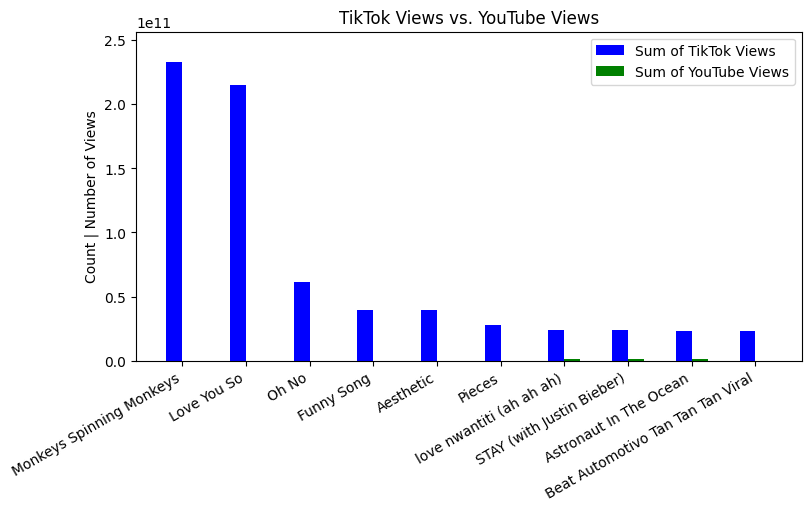

In [54]:
# Prepare the bar chart
x = np.arange(len(top_ten_tiktok_df['Song']))  # the label locations
width = 0.25                                   # the width of the bars

# Create the subplot
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')   # constrained to prevent overlap

# Plot the bars
tiktok_bar = ax.bar(x-width/2, top_ten_tiktok_df['Sum of TikTok Views'], width, label='Sum of TikTok Views', color='blue')
spotify_bar = ax.bar(x+width/2, top_ten_tiktok_df['Sum of YouTube Views'], width, label='Sum of YouTube Views', color='green')

# Formatting
ax.set_ylabel('Count | Number of Views')
ax.set_title('TikTok Views vs. YouTube Views')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_tiktok_df['Song'], rotation=30, ha='right')  # Rotate labels for readability
ax.legend()

max_value = max(top_ten_tiktok_df['Sum of YouTube Views'].max(), top_ten_tiktok_df['Sum of TikTok Views'].max())
ax.set_ylim(0, max_value * 1.1)          # Set y-limit slightly above max value


In [55]:
# Create top 500 TikTok dataframe

# Sort DataFrame by TikTok Views in descending order
top_500_tiktok_df = merged_df.sort_values(by='Sum of TikTok Views', ascending=False).head(501)

# Remove the 'Grand Total' row
top_500_tiktok_df = top_500_tiktok_df[top_500_tiktok_df['Song'] != 'Grand Total']

# Apply styling for better readability (for display purposes)
formatted_top_500_df = top_500_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']].style.format({
    'Sum of TikTok Likes': '{:,.2f}',
    'Sum of YouTube Likes': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',
    'Sum of YouTube Views': '{:,.2f}',
    'Sum of TikTok Views': '{:,.2f}',
    'Max of Spotify Popularity': '{:,}'  # Add commas, no decimals
})

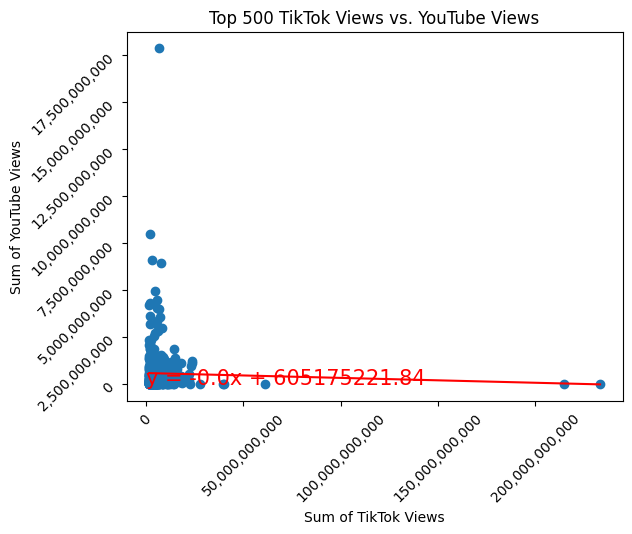

The r^2-value is: 0.0010704166800836227


In [56]:
# YouTube vs TikTok Views
# Does high TikTok views correlate to high youtube views?

x_values = top_500_tiktok_df['Sum of TikTok Views']
y_values = top_500_tiktok_df['Sum of YouTube Views']

# the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

#the scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel("Sum of TikTok Views")
plt.ylabel("Sum of YouTube Views")
plt.title("Top 500 TikTok Views vs. YouTube Views")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Adjust x-axis and y-axis to show full values with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

print(f"The r^2-value is: {rvalue**2}")

In [57]:
##trying something here
## Create top 500 youtube dataframe

# Sort DataFrame by TikTok Views in descending order
top_500_youtube_df = merged_df.sort_values(by='Sum of YouTube Views', ascending=False).head(501)

# Remove the 'Grand Total' row
top_500_youtube_df = top_500_youtube_df[top_500_youtube_df['Song'] != 'Grand Total']

# Apply styling for better readability (for display purposes)
formatted_top_500_df = top_500_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of Spotify Streams']].style.format({
    'Sum of TikTok Likes': '{:,.2f}',
    'Sum of YouTube Likes': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',
    'Sum of YouTube Views': '{:,.2f}',
    'Sum of TikTok Views': '{:,.2f}',
    'Max of Spotify Popularity': '{:,}'  # Add commas, no decimals
})

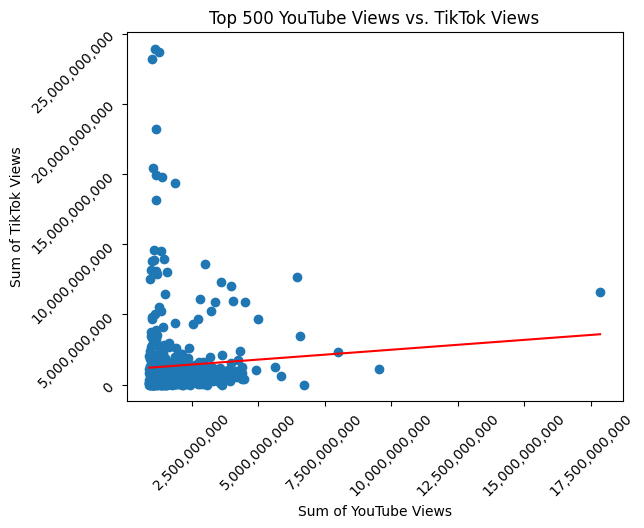

The r^2-value is: 0.0038564823274053824


In [58]:
#Switch Control (opposite of above chart)
# YouTube vs TikTok Views
# Does high TikTok views correlate to high youtube views?

y_values = top_500_youtube_df['Sum of TikTok Views']
x_values = top_500_youtube_df['Sum of YouTube Views']

# the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

#the scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.ylabel("Sum of TikTok Views")
plt.xlabel("Sum of YouTube Views")
plt.title("Top 500 YouTube Views vs. TikTok Views")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Adjust x-axis and y-axis to show full values with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

print(f"The r^2-value is: {rvalue**2}")

In [ ]:
##############################################

In [ ]:
#### final deliverables starting here ####

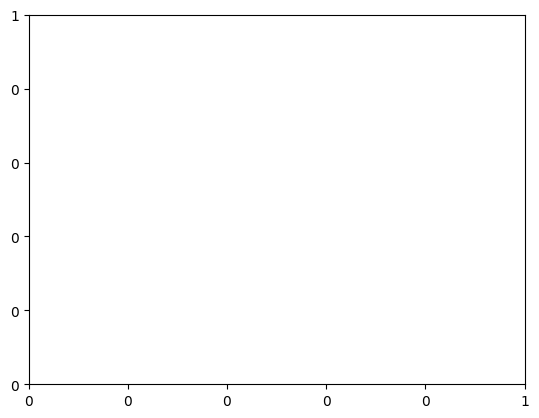

In [61]:
# Adjust x-axis and y-axis to show full values with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

In [ ]:
##############################################

In [62]:
# Top 500 TikTok Views vs YouTube Views
# YouTube vs TikTok Views
# Does high TikTok views correlate to high youtube views?

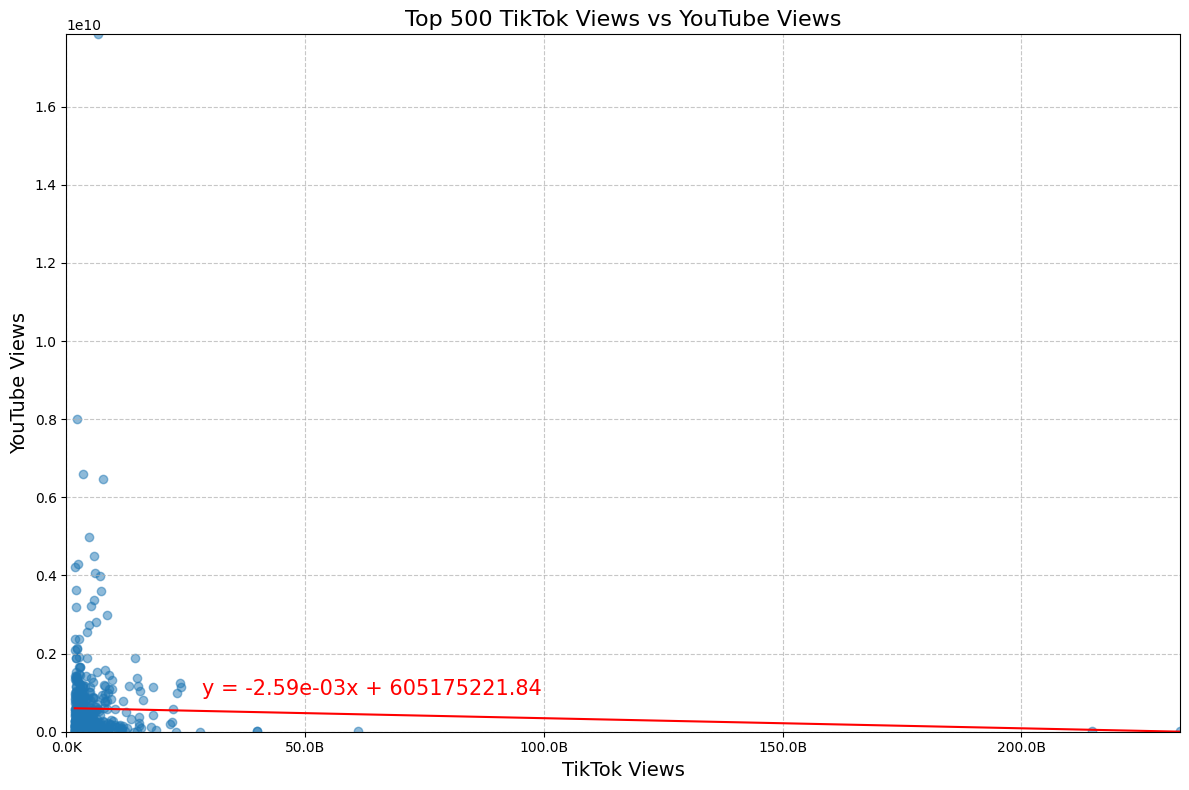

Correlation between TikTok Views and YouTube Views: -0.0327
R-squared: 0.0011


In [75]:
# YouTube vs TikTok Views
# Does high TikTok views correlate to high youtube views?

# Define a function to format axis ticks
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'  # convert to billions (e.g. 1,000,000,000 -> 1.0B)
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'  # convert to millions (e.g. 1,000,000 -> 1.0M)
    else:
        return f'{x/1e3:.1f}K'  # convert to thousands (e.g. 1,000 -> 1.0K)

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500_tiktok_df['Sum of TikTok Views'], 
            top_500_tiktok_df['Sum of YouTube Views'], 
            alpha=0.5)
##^I don't have data_cleaned, swapped in my original x/y values

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500_tiktok_df['Sum of TikTok Views'], 
                                                            top_500_tiktok_df['Sum of YouTube Views'])
line = slope * top_500_tiktok_df['Sum of TikTok Views'] + intercept

# Plot the line of best fit
plt.plot(top_500_tiktok_df['Sum of TikTok Views'], line, color='r', 
         label=f'y = {slope:.2e}x + {intercept:.2f}')     # uses scientific notation for slope for readability


# Add the formula as a label on the graph
x_pos = top_500_tiktok_df['Sum of TikTok Views'].mean()    # x-position for the label
y_pos = slope * x_pos + intercept                         # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10),                             # offest text so it's not directly on top of data
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('TikTok Views', fontsize=14)
plt.ylabel('YouTube Views', fontsize=14)
plt.title('Top 500 TikTok Views vs YouTube Views', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits
max_popularity = top_500_tiktok_df['Sum of YouTube Views'].max()
plt.ylim(0, max_popularity)                               # this sets the y-axis range

# set x-axis limits
#plt.xlim(0)

# Set x-axis limits
plt.xlim(0, top_500_tiktok_df['Sum of TikTok Views'].max())

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = top_500_tiktok_df['Sum of TikTok Views'].corr(top_500_tiktok_df['Sum of YouTube Views'])
print(f"Correlation between TikTok Views and YouTube Views: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")


#### original code below ####

#x_values = top_500_tiktok_df['Sum of TikTok Views']
#y_values = top_500_tiktok_df['Sum of YouTube Views']

# the output will be a tuple of multiple values  for linear regression
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regress_values = x_values * slope + intercept

#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

#the scatterplot
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#plt.xlabel("Sum of TikTok Views")
#plt.ylabel("Sum of YouTube Views")
#plt.title("Top 500 TikTok Views vs. YouTube Views")
#plt.xticks(rotation=45)
#plt.yticks(rotation=45)



#plt.show()

#print(f"The r^2-value is: {rvalue**2}")

In [ ]:
Analysis:

In [ ]:
#### #### ####

In [ ]:
# Top 500 YouTube Views vs TikTok Views (switch control)

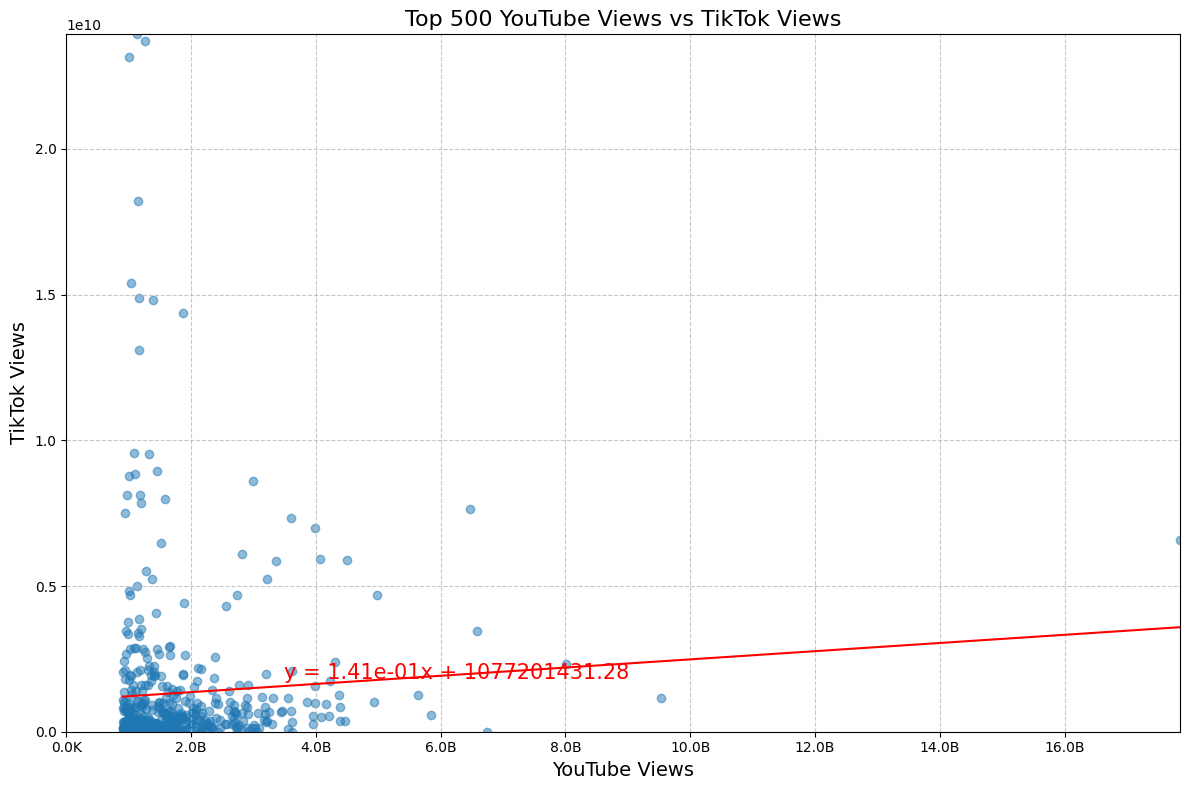

Correlation between YouTube Views and TikTok Views: 0.0621
R-squared: 0.0039


In [76]:
#Switch Control (opposite of above chart)
# YouTube vs TikTok Views
# Does high YouTube views correlate to high TikTok views?


#y_values = top_500_youtube_df['Sum of TikTok Views']
#x_values = top_500_youtube_df['Sum of YouTube Views']

# Define a function to format axis ticks
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'  # convert to billions (e.g. 1,000,000,000 -> 1.0B)
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'  # convert to millions (e.g. 1,000,000 -> 1.0M)
    else:
        return f'{x/1e3:.1f}K'  # convert to thousands (e.g. 1,000 -> 1.0K)

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500_youtube_df['Sum of YouTube Views'], 
            top_500_youtube_df['Sum of TikTok Views'], 
            alpha=0.5)
##^I don't have data_cleaned, swapped in my original x/y values

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500_youtube_df['Sum of YouTube Views'], 
                                                            top_500_youtube_df['Sum of TikTok Views'])
line = slope * top_500_youtube_df['Sum of YouTube Views'] + intercept

# Plot the line of best fit
plt.plot(top_500_youtube_df['Sum of YouTube Views'], line, color='r', 
         label=f'y = {slope:.2e}x + {intercept:.2f}')     # uses scientific notation for slope for readability


# Add the formula as a label on the graph
x_pos = top_500_youtube_df['Sum of YouTube Views'].mean()    # x-position for the label
y_pos = slope * x_pos + intercept                         # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10),                             # offest text so it's not directly on top of data
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('YouTube Views', fontsize=14)
plt.ylabel('TikTok Views', fontsize=14)
plt.title('Top 500 YouTube Views vs TikTok Views', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# set x-axis limits
#plt.xlim(0)

# Set x-axis limits
plt.xlim(0, top_500_youtube_df['Sum of YouTube Views'].max())

# Set y-axis limits
max_popularity = top_500_youtube_df['Sum of TikTok Views'].max()
plt.ylim(0, max_popularity)                               # this sets the y-axis range

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = top_500_youtube_df['Sum of YouTube Views'].corr(top_500_youtube_df['Sum of TikTok Views'])
print(f"Correlation between YouTube Views and TikTok Views: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")



#### original code ####

#y_values = top_500_youtube_df['Sum of TikTok Views']
#x_values = top_500_youtube_df['Sum of YouTube Views']

# the output will be a tuple of multiple values  for linear regression
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regress_values = x_values * slope + intercept

#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

#the scatterplot
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#plt.ylabel("Sum of TikTok Views")
#plt.xlabel("Sum of YouTube Views")
#plt.title("Top 500 YouTube Views vs. TikTok Views")
#plt.xticks(rotation=45)
#plt.yticks(rotation=45)

# Adjust x-axis and y-axis to show full values with commas
#plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

#plt.show()

#print(f"The r^2-value is: {rvalue**2}")

In [ ]:
Analysis: 

In [ ]:
#### #### ####

In [68]:
#top 10 tiktok views vs youtube views

# Create the top 10 tiktok views dataframe

# Sort DataFrame by TikTok Views in descending order
top_ten_tiktok_df = top_500_tiktok_df.sort_values(by='Sum of TikTok Views', ascending=False).head(10)

# Display top 10 TikTok-viewed songs with their Spotify Streams
top_ten_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of YouTube Views']]

# Apply styling for better readability (for display purposes)
formatted_ten_tiktok_df = top_ten_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of YouTube Views']].style.format({
    'TikTok Views': '{:,.2f}',
    'Youtube Views': '{:,.2f}',  # Add commas, 2 decimals
})

formatted_ten_tiktok_df

,Song,Sum of TikTok Views,Sum of YouTube Views
3201,Monkeys Spinning Monkeys,233232311463.000000,11457166.000000
2962,Love You So,214843956590.000000,7603329.000000
2863,Oh No,61088562861.000000,17978707.000000
3500,Funny Song,39946312291.000000,11793478.000000
3011,Aesthetic,39850634464.000000,6658234.000000
3646,Pieces,28032695489.000000,283023.000000
407,love nwantiti (ah ah ah),23933379729.000000,1132006963.000000
4,STAY (with Justin Bieber),23712377029.000000,1256973582.000000
108,Astronaut In The Ocean,23156752648.000000,1001433936.000000
3503,Beat Automotivo Tan Tan Tan Viral,22918660728.000000,4233958.000000


In [71]:
# Create a dataframe with percentages of TikTok Views and YouTube Views

# Calculate the percentages
total_tiktok = top_ten_tiktok_df['Sum of TikTok Views'].sum()     # find the total sum first
total_youtube  = top_ten_tiktok_df['Sum of YouTube Views'].sum()

# Convert each song into a percentage of the total
top_ten_tiktok_df['TikTok Percentage'] = (top_ten_tiktok_df['Sum of TikTok Views'] / total_tiktok) * 100
top_ten_tiktok_df['Youtube Percentage'] = (top_ten_tiktok_df['Sum of YouTube Views'] / total_youtube) * 100

# Apply styling for better readability
formatted_ten_tiktok_df = top_ten_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of YouTube Views', 'TikTok Percentage', 'Youtube Percentage']].style.format({
    'TikTok Views': '{:,.2f}',
    'Youtube Views': '{:,.2f}',
    'TikTok Percentage': '{:.0f}%',
    'Youtube Percentage': '{:.0f}%'
})

formatted_ten_tiktok_df

,Song,Sum of TikTok Views,Sum of YouTube Views,TikTok Percentage,Youtube Percentage
3201,Monkeys Spinning Monkeys,233232311463.000000,11457166.000000,33%,0%
2962,Love You So,214843956590.000000,7603329.000000,30%,0%
2863,Oh No,61088562861.000000,17978707.000000,9%,1%
3500,Funny Song,39946312291.000000,11793478.000000,6%,0%
3011,Aesthetic,39850634464.000000,6658234.000000,6%,0%
3646,Pieces,28032695489.000000,283023.000000,4%,0%
407,love nwantiti (ah ah ah),23933379729.000000,1132006963.000000,3%,33%
4,STAY (with Justin Bieber),23712377029.000000,1256973582.000000,3%,36%
108,Astronaut In The Ocean,23156752648.000000,1001433936.000000,3%,29%
3503,Beat Automotivo Tan Tan Tan Viral,22918660728.000000,4233958.000000,3%,0%


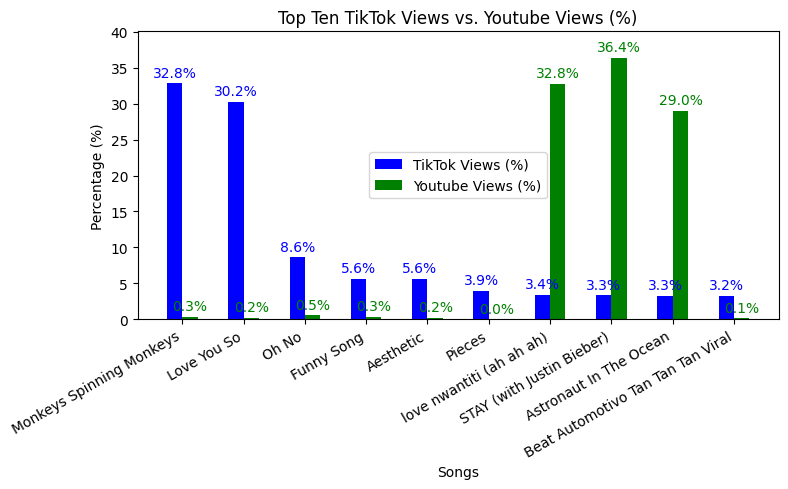

In [72]:
# Create a bar chart comparing the percentages of tiktok views and youtube views

# Prepare the bar chart
x = np.arange(len(top_ten_tiktok_df['Song']))  # the label locations
width = 0.25                                   # the width of the bars

# Create the subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bars
tiktok_bar = ax.bar(x-width/2, top_ten_tiktok_df['TikTok Percentage'], width, label='TikTok Views (%)', color='blue')
spotify_bar = ax.bar(x+width/2, top_ten_tiktok_df['Youtube Percentage'], width, label='Youtube Views (%)', color='green')

# Formatting
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Songs')
ax.set_title('Top Ten TikTok Views vs. Youtube Views (%)')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_tiktok_df['Song'], rotation=30, ha='right')  # Rotate labels for readability
ax.legend()

# Fix y-limit to match percentage values
max_percentage = max(top_ten_tiktok_df['TikTok Percentage'].max(), top_ten_tiktok_df['Youtube Percentage'].max())
ax.set_ylim(0, max_percentage * 1.1)     # Set y-limit slightly above max percentage

# Add labels above bars
for i, (tiktok, spotify) in enumerate(zip(top_ten_tiktok_df['TikTok Percentage'], top_ten_tiktok_df['Youtube Percentage'])):
    ax.text(i - width/2, tiktok + 0.5, f"{tiktok:.1f}%", ha='center', va='bottom', fontsize=10, color='blue')
    ax.text(i + width/2, spotify + 0.5, f"{youtube:.1f}%", ha='center', va='bottom', fontsize=10, color='green')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
Analysis:

In [ ]:
#### #### ####

In [ ]:
#top 10 youtube views vs tiktok views

In [85]:
#Create a top 10 youtube views dataframe

# Sort DataFrame by Youtube Views in descending order
top_ten_youtube_df = top_500_youtube_df.sort_values(by='Sum of YouTube Views', ascending=False).head(10)

# Display top 10 Youtube songs with their TikTok views
top_ten_youtube_df[['Song', 'Sum of TikTok Views', 'Sum of YouTube Views']]

# Calculate the percentages
total_tiktok = top_ten_youtube_df['Sum of TikTok Views'].sum()     # find the total sum first
total_youtube  = top_ten_youtube_df['Sum of YouTube Views'].sum()

# Convert each song into a percentage of the total
top_ten_youtube_df['TikTok Percentage'] = (top_ten_youtube_df['Sum of TikTok Views'] / total_tiktok) * 100
top_ten_youtube_df['Youtube Percentage'] = (top_ten_youtube_df['Sum of YouTube Views'] / total_youtube) * 100

# Apply styling for better readability
formatted_ten_youtube_df = top_ten_youtube_df[['Song', 'Sum of TikTok Views', 'Sum of YouTube Views', 'TikTok Percentage', 'Youtube Percentage']].style.format({
    'TikTok Views': '{:,.2f}',
    'Youtube Views': '{:,.2f}',
    'TikTok Percentage': '{:.0f}%',
    'Youtube Percentage': '{:.0f}%'
})

formatted_ten_youtube_df

,Song,Sum of TikTok Views,Sum of YouTube Views,TikTok Percentage,Youtube Percentage
1472,Baby Shark,6578198892.000000,17850302158.000000,23%,23%
379,Despacito,1143297071.000000,9537135721.000000,4%,12%
55,Shape of You,2320856331.000000,8013997219.000000,8%,10%
3971,bathroom floor,22234.000000,6736502312.000000,0%,9%
168,See You Again (feat. Charlie Puth),3455170110.000000,6584796389.000000,12%,9%
90,Perfect,7647479866.000000,6473698897.000000,27%,8%
930,Gangnam Style (ï¿½ï¿½ï¿½ï¿½ï¿½ï,578660460.000000,5849588091.000000,2%,8%
126,Uptown Funk,1268235679.000000,5644117304.000000,4%,7%
191,Faded,4682550852.000000,4982885995.000000,16%,7%
160,Alone,1018908908.000000,4927631633.000000,4%,6%


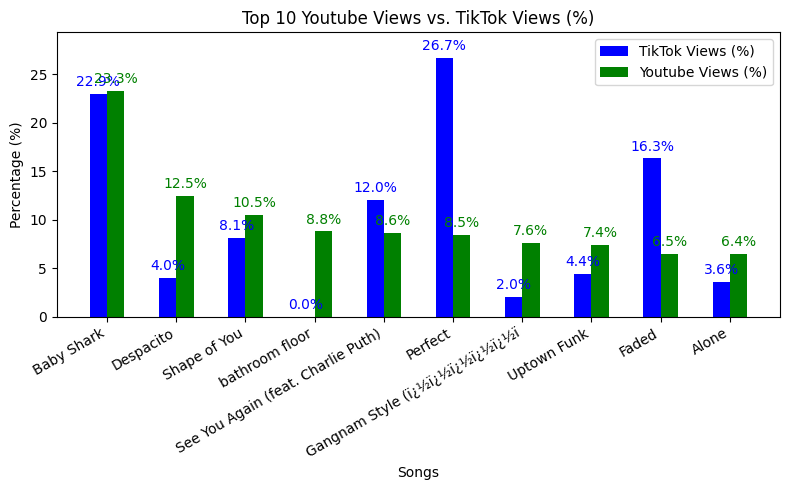

In [89]:
# Prepare the bar chart
x = np.arange(len(top_ten_youtube_df['Song']))  # the label locations
width = 0.25                                   # the width of the bars

# Create the subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bars
tiktok_bar = ax.bar(x-width/2, top_ten_youtube_df['TikTok Percentage'], width, label='TikTok Views (%)', color='blue')
youtube_bar = ax.bar(x+width/2, top_ten_youtube_df['Youtube Percentage'], width, label='Youtube Views (%)', color='green')

# Formatting
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Songs')
ax.set_title('Top 10 Youtube Views vs. TikTok Views (%)')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_youtube_df['Song'], rotation=30, ha='right')  # Rotate labels for readability
ax.legend()

# Fix y-limit to match percentage values
max_percentage = max(top_ten_youtube_df['TikTok Percentage'].max(), top_ten_youtube_df['Youtube Percentage'].max())
ax.set_ylim(0, max_percentage * 1.1)     # Set y-limit slightly above max percentage

# Add labels above bars
for i, (tiktok, youtube) in enumerate(zip(top_ten_youtube_df['TikTok Percentage'], top_ten_youtube_df['Youtube Percentage'])):
    ax.text(i - width/2, tiktok + 0.5, f"{tiktok:.1f}%", ha='center', va='bottom', fontsize=10, color='blue')
    ax.text(i + width/2, youtube + 0.5, f"{youtube:.1f}%", ha='center', va='bottom', fontsize=10, color='green')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()